**BanK Marketting**

**Name:** Ansu Isac

**Organization:** Entri Elevate

**Date:** 18/12/2024



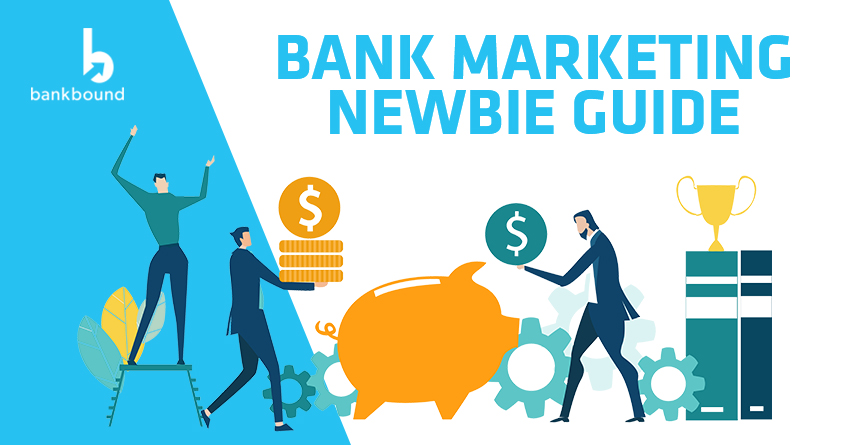


1. **Overview of Problem Statement:**
  For marketing purposes, banks contact a lot of clients for promotion in term deposit subscriptions. Here, the aim of making a prediction is when the client will subscribe or not for a term deposit basis (y = yes/no). Using predictive modeling makes the bank identify the most suitable clients, optimize strategies of marketing, minimize direct operating costs, and get good campaign effectiveness. Key challenges associated with this include class imbalance management, handling missing or "unknown" values, and interpreting influential factors for better decision-making.

  

2. **Objective:**

  The classification goal is to predict if the client will subscribe a term deposit.
3. **Data Description:**

- Source: https://archive.ics.uci.edu/dataset/222/bank+marketing
- Features: age,job	,marital,	education,	default,	balance,	housing,	loan	contact,	day,	month,	duration,	campaign,	pdays,	previous,	poutcome,	y(term deposit)


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, SelectFromModel

**Data Collection**

In [114]:
Bank_data=pd.read_csv('bank-full.csv',sep=';')
Bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [115]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [116]:
Bank_data.shape

(45211, 17)

In [117]:
Bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Data Preprosesing**

In [118]:
Bank_data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [119]:
Bank_data.duplicated().sum()

0

In [120]:
bank_data=Bank_data.drop_duplicates()

In [121]:
for column in Bank_data.select_dtypes(include=['object']).columns:
  print(f"Unique values in {column}:")
  print(Bank_data[column].unique())
  print()

Unique values in job:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique values in marital:
['married' 'single' 'divorced']

Unique values in education:
['tertiary' 'secondary' 'unknown' 'primary']

Unique values in default:
['no' 'yes']

Unique values in housing:
['yes' 'no']

Unique values in loan:
['no' 'yes']

Unique values in contact:
['unknown' 'cellular' 'telephone']

Unique values in month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Unique values in poutcome:
['unknown' 'failure' 'other' 'success']

Unique values in y:
['no' 'yes']



In [122]:
columns_to_check = ['job', 'education', 'poutcome','contact']

unknown_counts = {}
for col in columns_to_check:
    unknown_counts[col] = Bank_data[col].value_counts().get('unknown', 0)

print("Count of 'unknown' values in each column:", unknown_counts)


Count of 'unknown' values in each column: {'job': 288, 'education': 1857, 'poutcome': 36959, 'contact': 13020}


In [123]:
# Drop columns with excessive Unknown values
Bank_data.drop('contact',axis=1,inplace=True)
Bank_data.drop('poutcome',axis=1,inplace=True)
Bank_data=Bank_data[Bank_data['education'] !='unknown']
Bank_data=Bank_data[Bank_data['job'] !='unknown']

In [124]:
Bank_data.shape

(43193, 15)

In [125]:
Bank_data.value_counts('y')

,count
y,
no,38172
yes,5021


In [126]:
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
Bank_data['month'] = Bank_data['month'].map(month_mapping)

In [127]:
numeric_columns = Bank_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = Bank_data.select_dtypes(include=['object']).columns

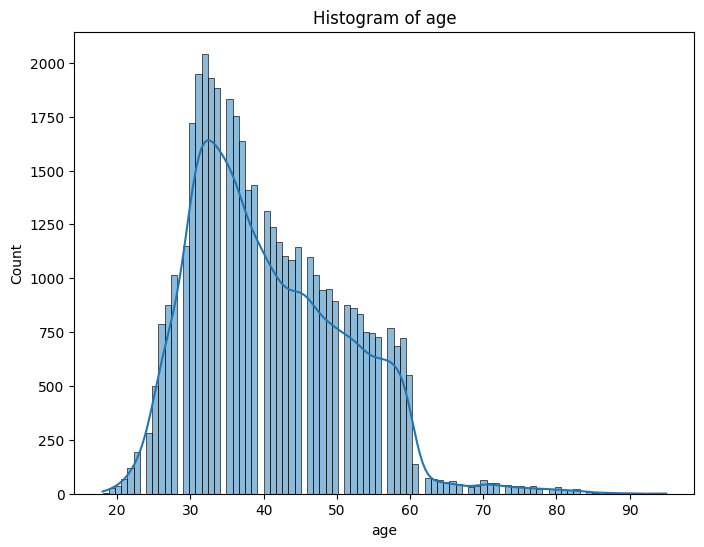

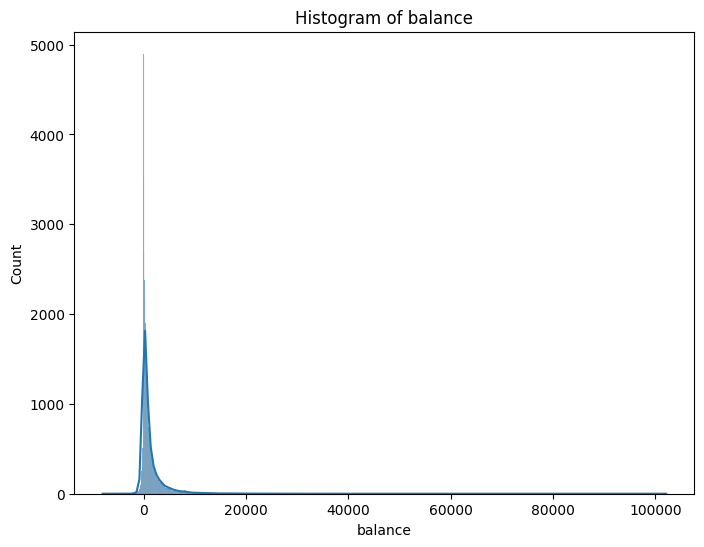

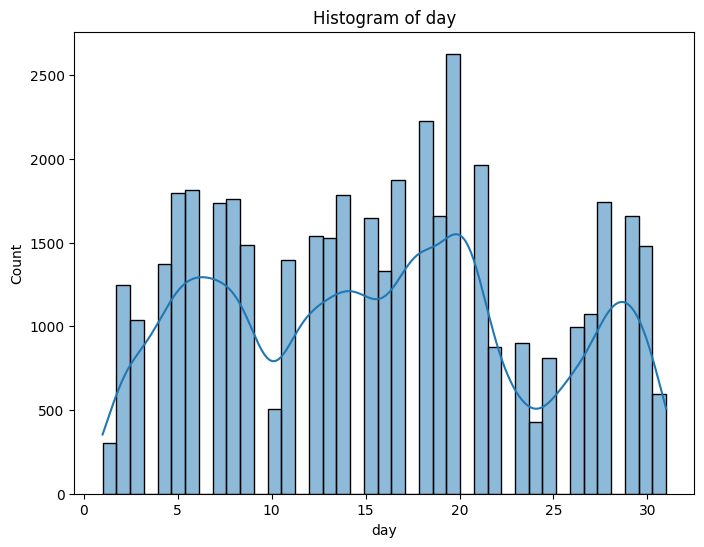

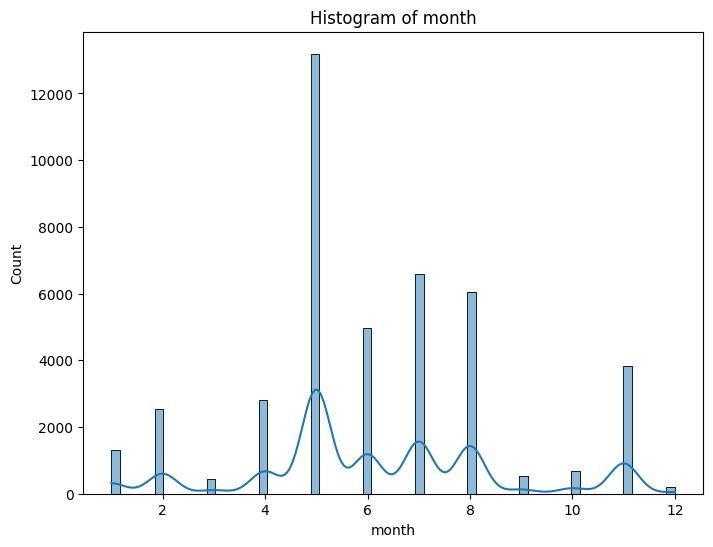

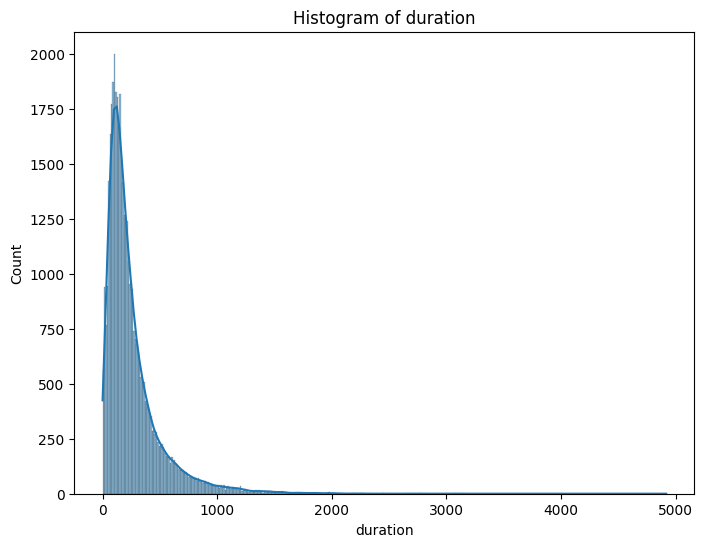

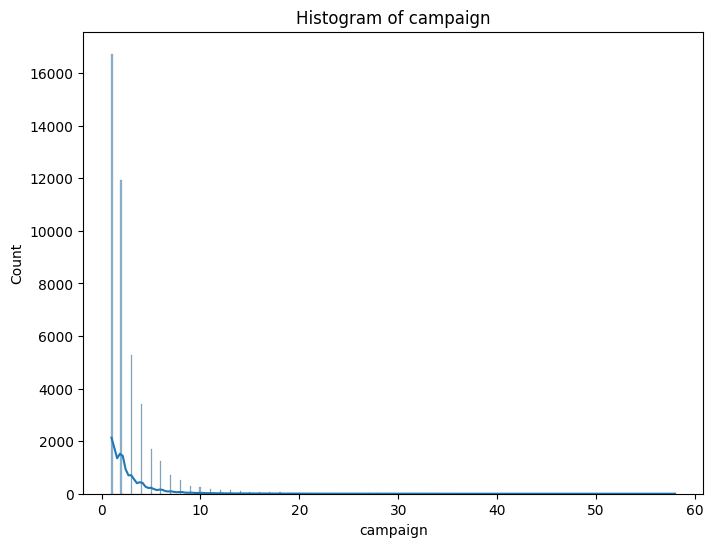

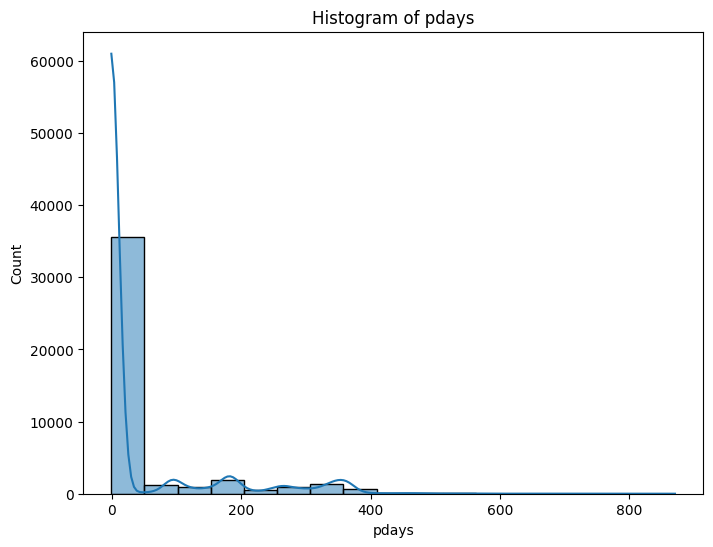

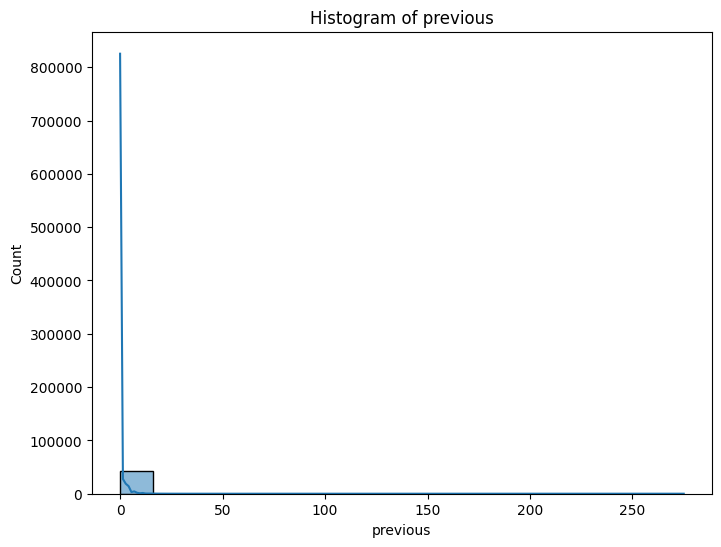

In [128]:
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(Bank_data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)

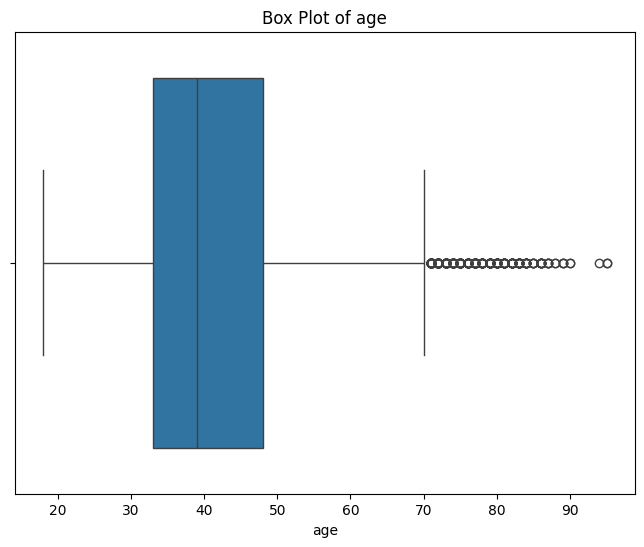

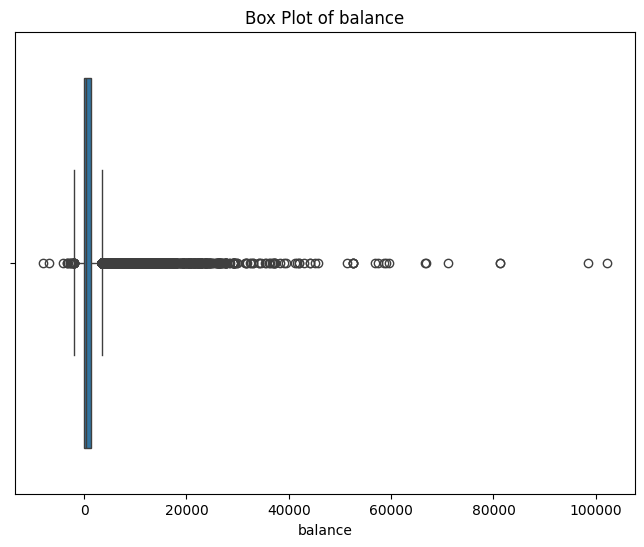

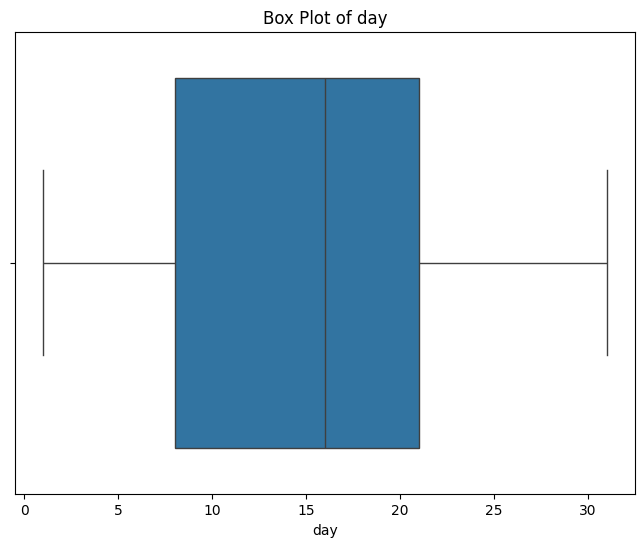

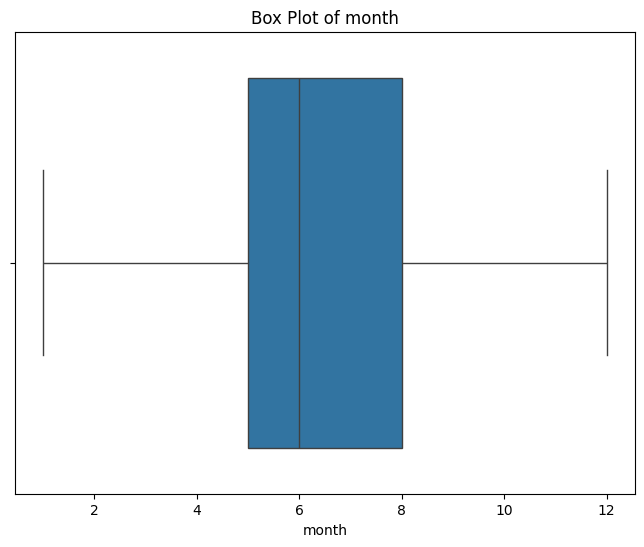

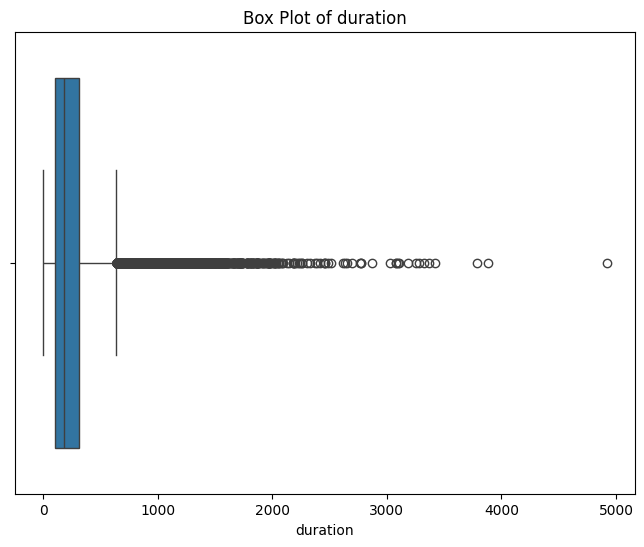

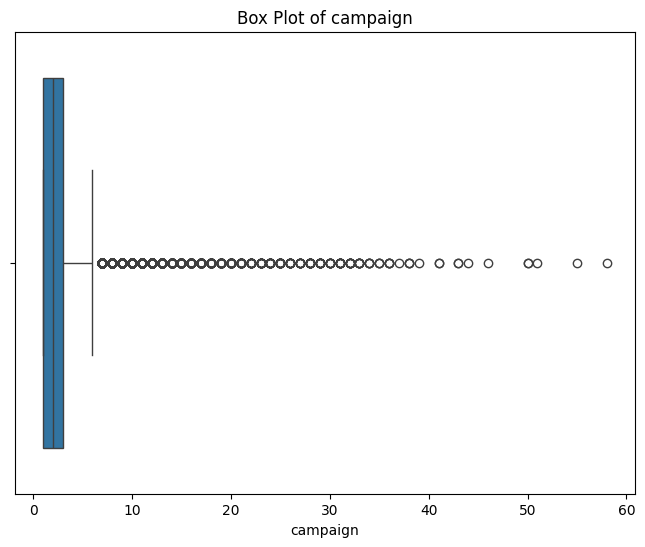

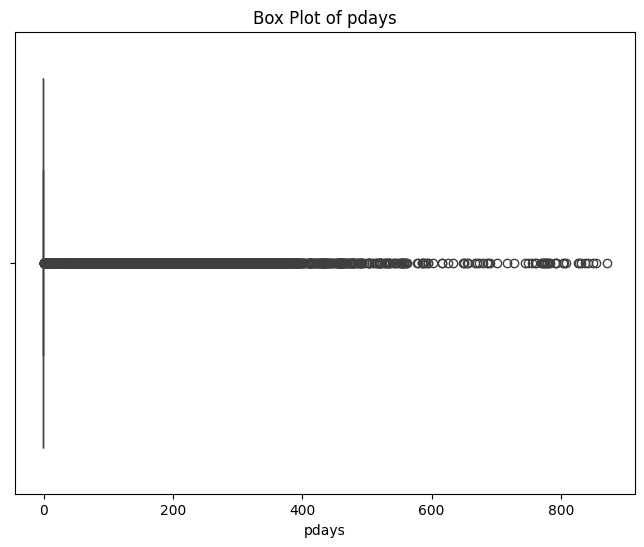

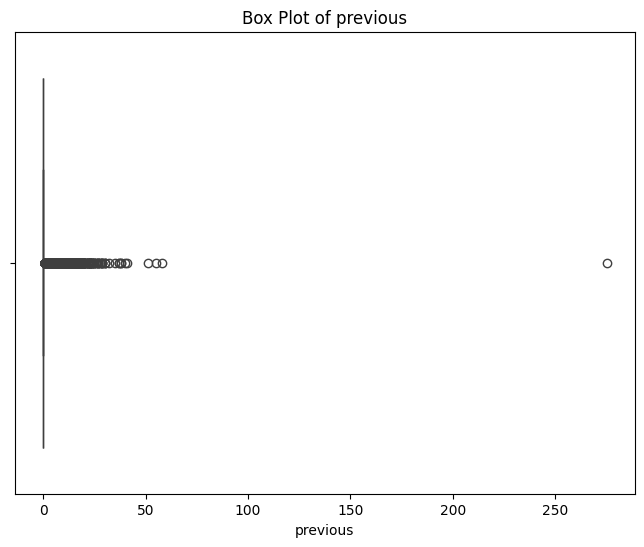

In [129]:
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=Bank_data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

Outliers Handling

In [130]:
def handle_outliers(df):
  for column in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
  return df

In [131]:
handle_outliers(Bank_data)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,5,5,261.0,1.0,-1.0,0.0,no
1,44.0,technician,single,secondary,no,29.0,yes,no,5,5,151.0,1.0,-1.0,0.0,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,5,5,76.0,1.0,-1.0,0.0,no
5,35.0,management,married,tertiary,no,231.0,yes,no,5,5,139.0,1.0,-1.0,0.0,no
6,28.0,management,single,tertiary,no,447.0,yes,yes,5,5,217.0,1.0,-1.0,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,17,11,640.5,3.0,-1.0,0.0,yes
45207,70.5,retired,divorced,primary,no,1729.0,no,no,17,11,456.0,2.0,-1.0,0.0,yes
45208,70.5,retired,married,secondary,no,3423.5,no,no,17,11,640.5,5.0,-1.0,0.0,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,17,11,508.0,4.0,-1.0,0.0,no


In [132]:
for col in categorical_columns:
    le = LabelEncoder()
    Bank_data[col] = le.fit_transform(Bank_data[col])

In [133]:
Bank_data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58.0,4,1,2,0,2143.0,1,0,5,5,261.0,1.0,-1.0,0.0,0
1,44.0,9,2,1,0,29.0,1,0,5,5,151.0,1.0,-1.0,0.0,0
2,33.0,2,1,1,0,2.0,1,1,5,5,76.0,1.0,-1.0,0.0,0
5,35.0,4,1,2,0,231.0,1,0,5,5,139.0,1.0,-1.0,0.0,0
6,28.0,4,2,2,0,447.0,1,1,5,5,217.0,1.0,-1.0,0.0,0


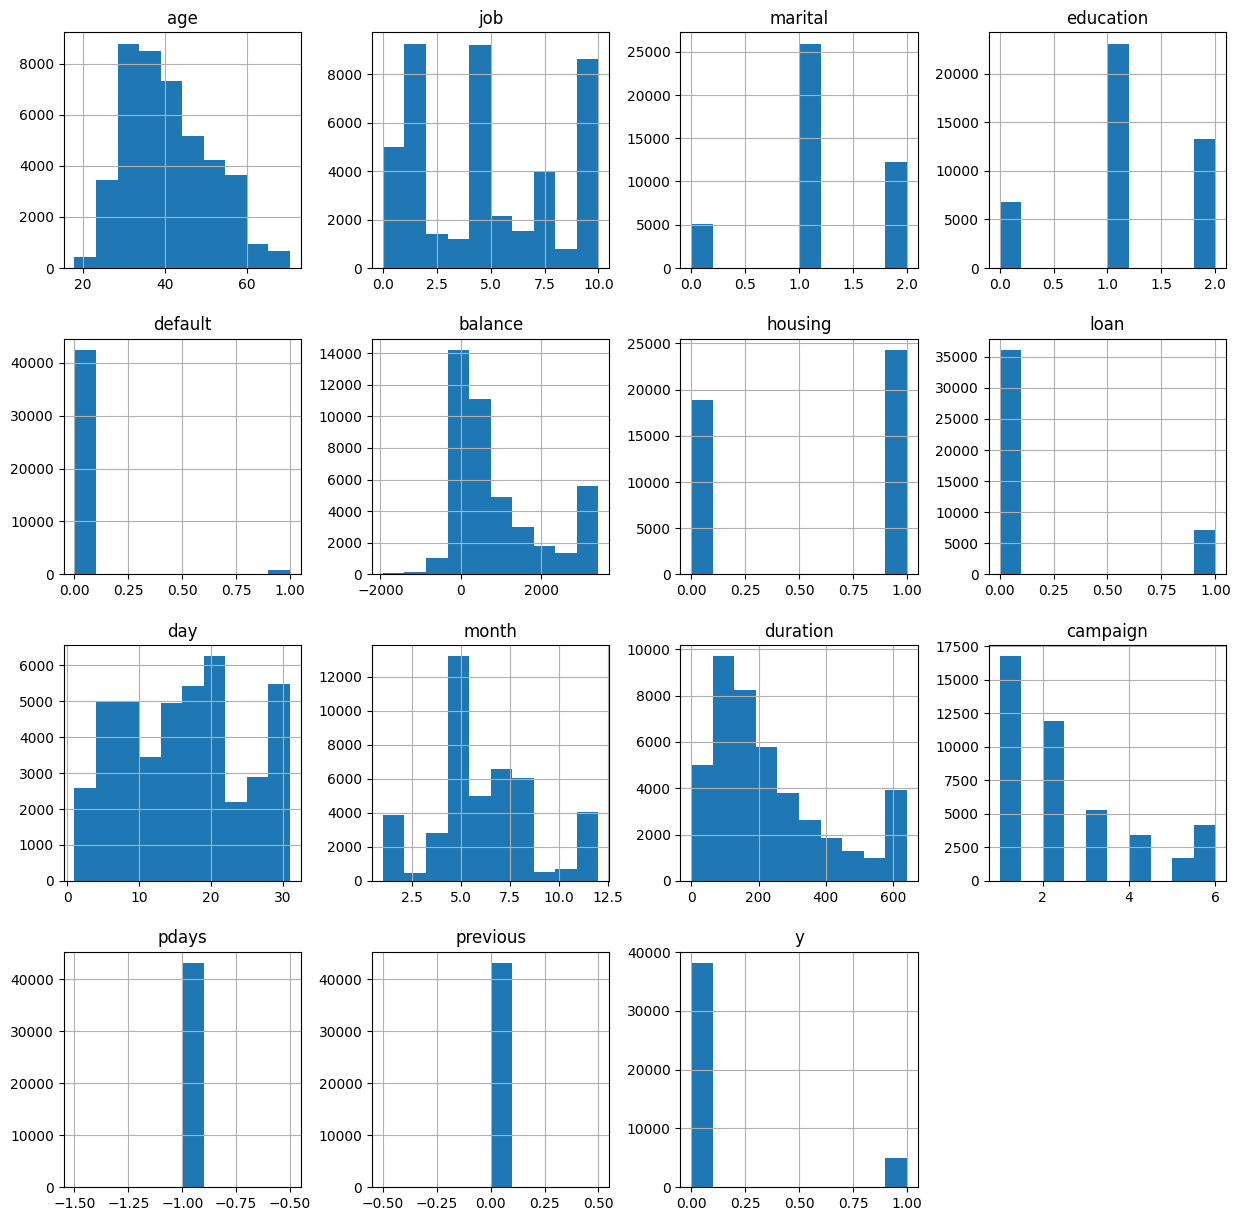

In [134]:
Bank_data.hist(figsize=(15, 15))
plt.show()

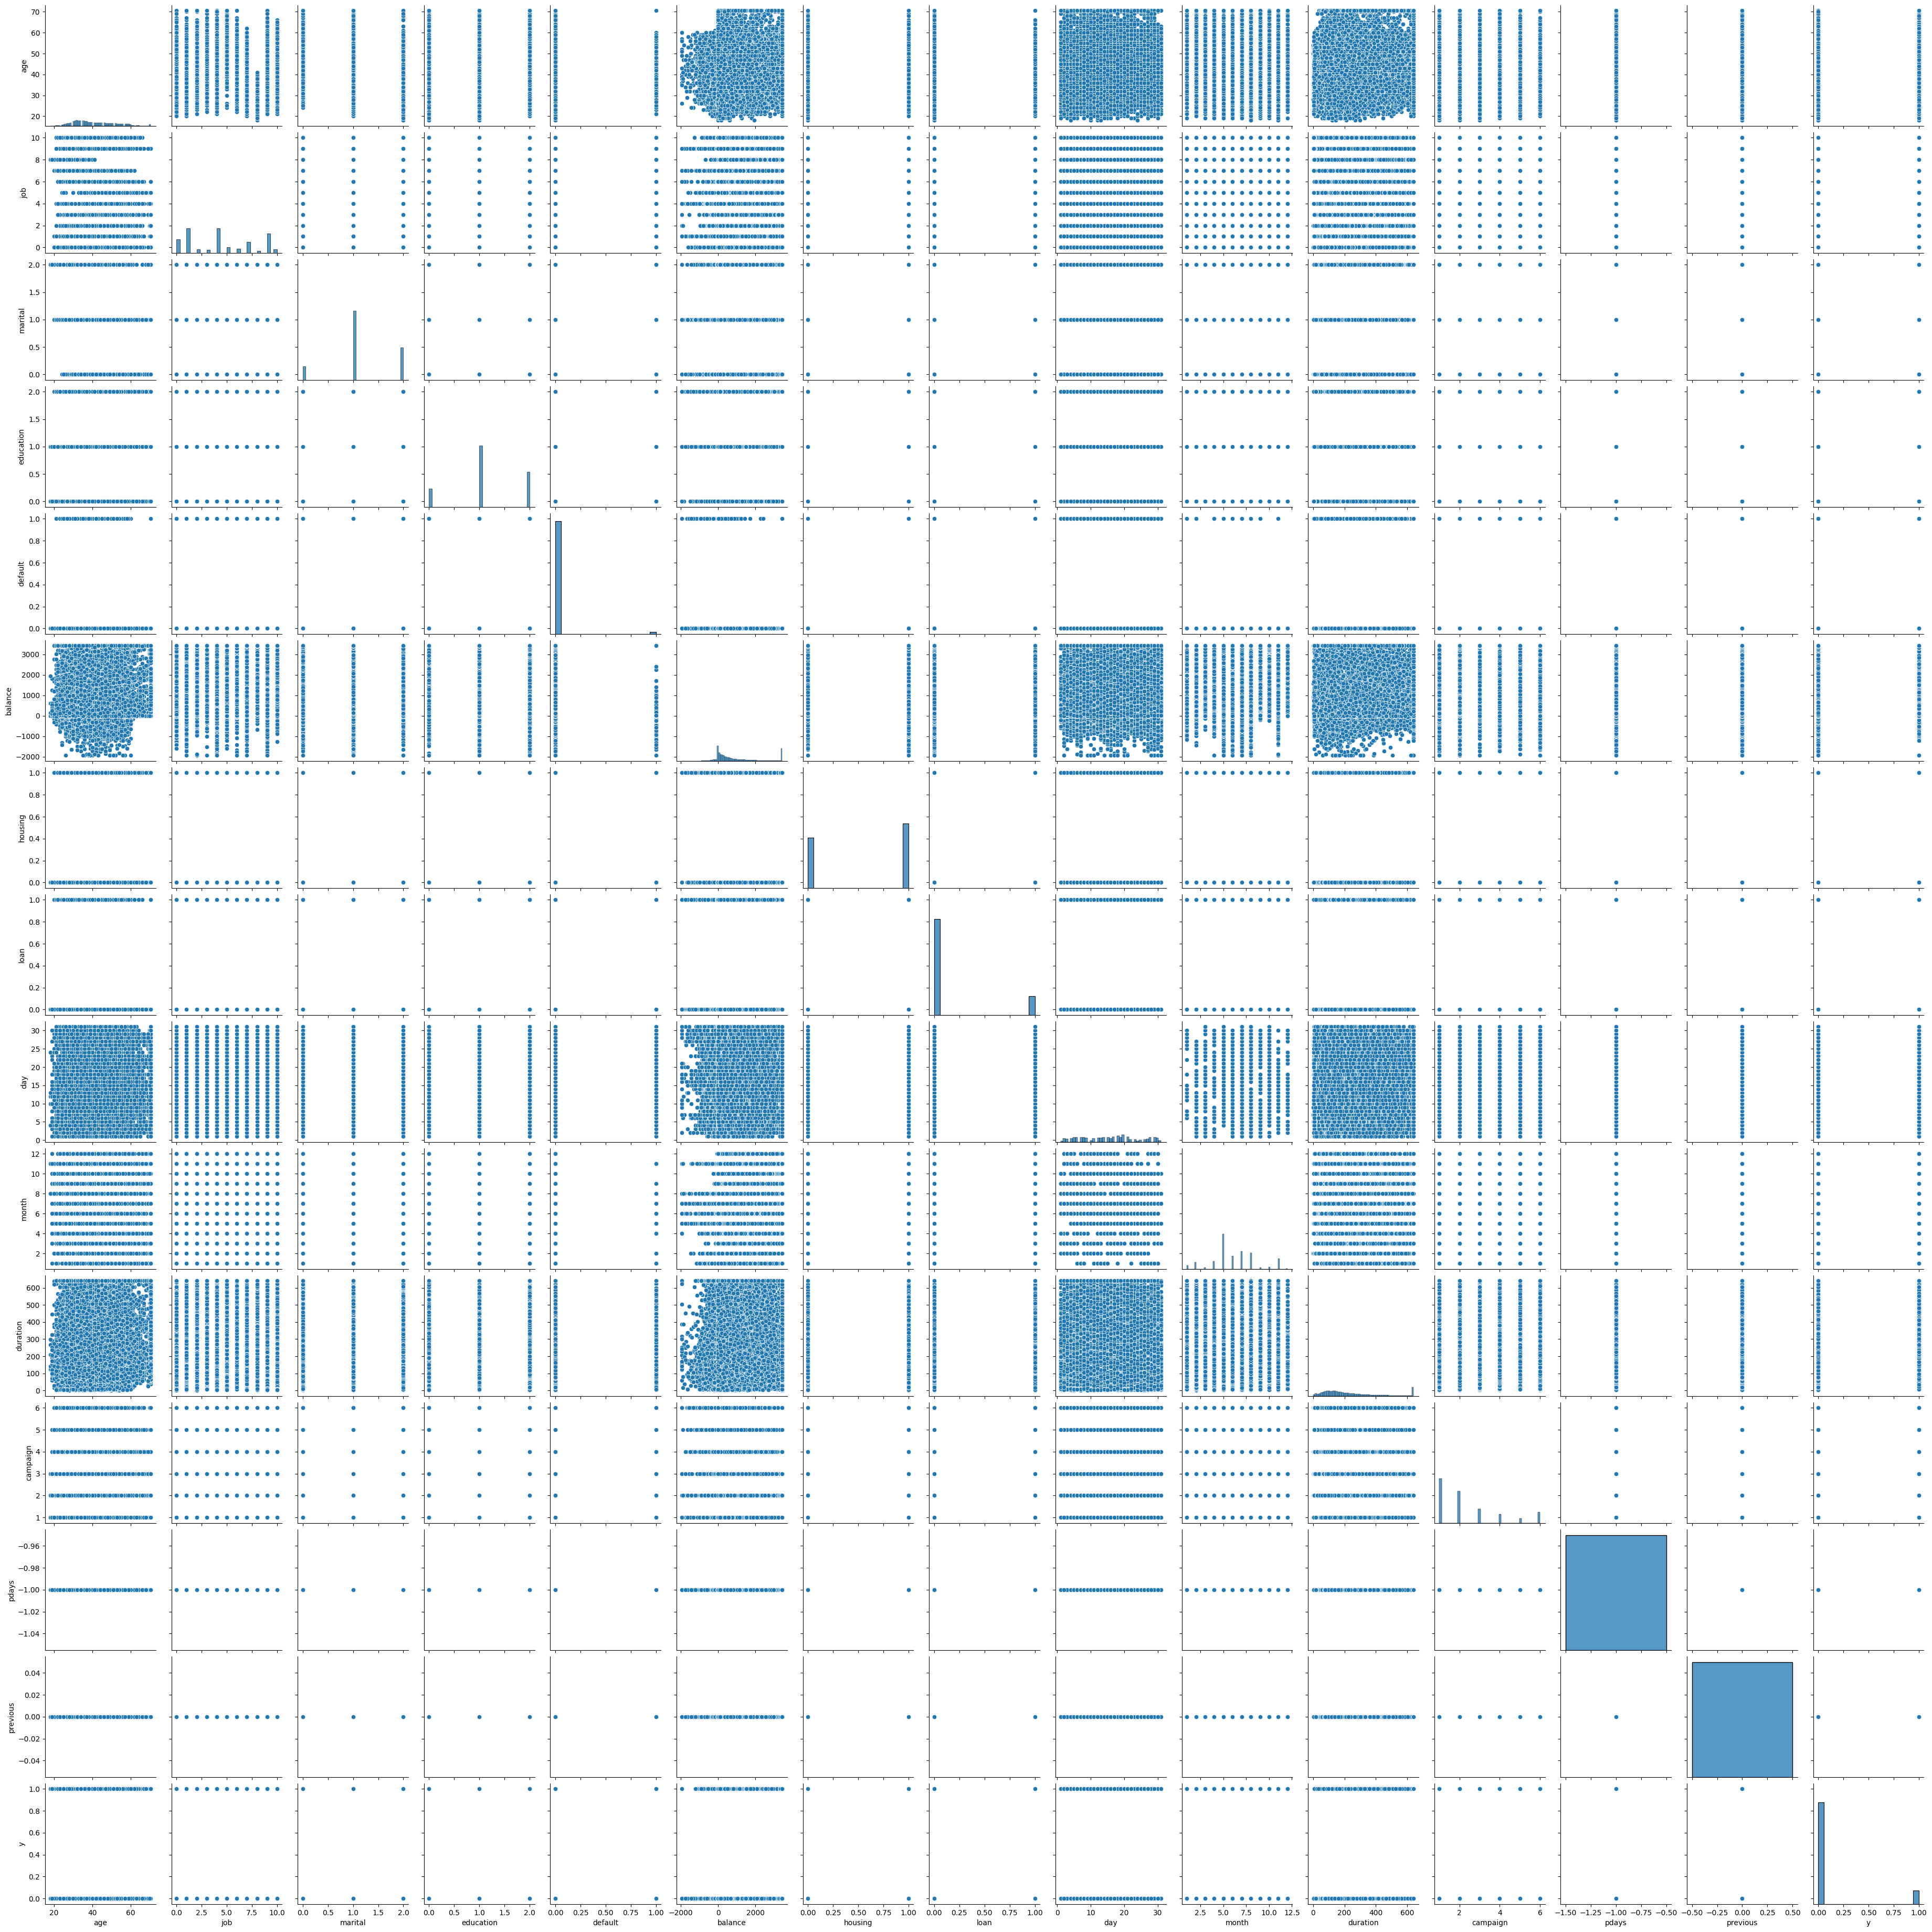

In [135]:
sns.pairplot(Bank_data)
plt.show()

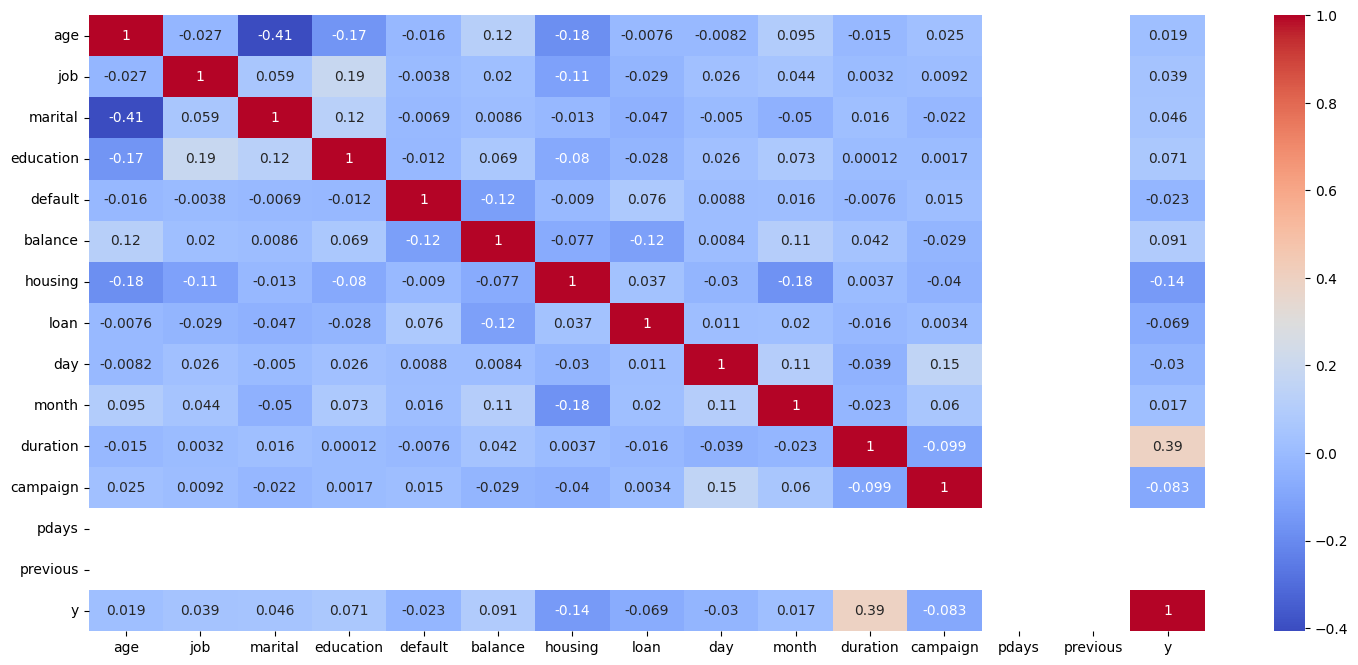

In [136]:
plt.figure(figsize=(18, 8))
sns.heatmap(Bank_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [137]:
Bank_data.value_counts('y')

,count
y,
0,38172
1,5021


**Spiting Datast For Training and Testing**

In [152]:
x=Bank_data.drop('y',axis=1)
y=Bank_data['y']

In [153]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)
x,y=smote.fit_resample(x,y)


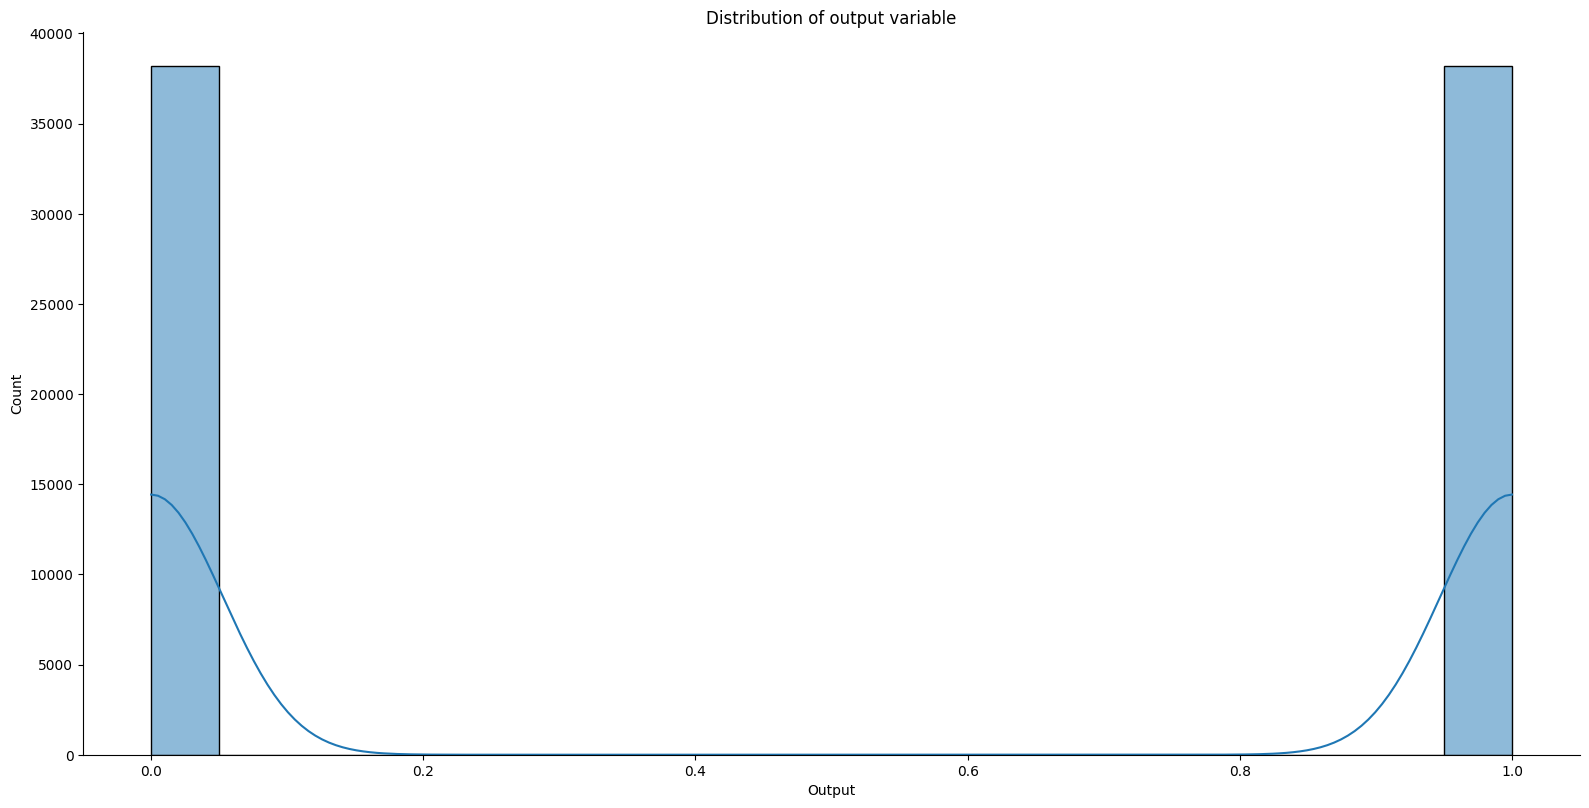

In [154]:
sns.displot(y,bins=20,kde=True,height=8,aspect=2)
plt.title('Distribution of output variable')
plt.xlabel('Output')
plt.ylabel('Count')
plt.show()

In [155]:
y.value_counts()

,count
y,
0,38172
1,38172


In [156]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Feature Selection**

In [157]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [158]:
#Using Random Forest Regressor Checking the Importance of Feature
importance=rf.feature_importances_
features_importance=pd.DataFrame({'Features':x_train.columns,'Importance':importance})
features_importance=features_importance.sort_values(by='Importance',ascending=False)
print(features_importance)

     Features  Importance
10   duration    0.319854
11   campaign    0.121824
6     housing    0.119194
5     balance    0.080757
0         age    0.079870
9       month    0.072648
8         day    0.070490
1         job    0.057348
7        loan    0.039068
3   education    0.020132
2     marital    0.016795
4     default    0.002021
12      pdays    0.000000
13   previous    0.000000


In [159]:
# Feature selecting
selected_features=features_importance[features_importance['Importance']>0.02]['Features']
print(selected_features)

10     duration
11     campaign
6       housing
5       balance
0           age
9         month
8           day
1           job
7          loan
3     education
Name: Features, dtype: object


In [160]:
selector=SelectFromModel(rf,threshold=0.02)
selector.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(), threshold=0.02)

In [161]:
features=x_train.columns[selector.get_support()]
print(features)

Index(['age', 'job', 'balance', 'housing', 'loan', 'day', 'month', 'duration',
       'campaign'],
      dtype='object')


In [162]:
x_train=selector.transform(x_train)
x_test=selector.transform(x_test)

In [163]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(61075, 9)
(15269, 9)
(61075,)
(15269,)


**Scaling**

In [164]:
Scaler=StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.transform(x_test)

**Building Model**

In [165]:
model_selection={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'SVM':SVC(),
    'KNN':KNeighborsClassifier(),
    'Gradient Boosting':GradientBoostingClassifier()
}

result={}
prediction={}

**Evaluating Model**

In [166]:
for name,model in model_selection.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  prediction[name]=y_pred
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)
  result[name]={
      'accuracy':accuracy,
      'precision':precision,
      'recall':recall,
      'f1':f1
  }


In [167]:
result_df=pd.DataFrame(result)
result_df
print(result_df.T)

                     accuracy  precision    recall        f1
Logistic Regression  0.825005   0.814871  0.843135  0.828762
Decision Tree        0.896260   0.892125  0.902595  0.897330
Random Forest        0.927107   0.917367  0.939497  0.928300
SVM                  0.862597   0.838169  0.900248  0.868100
KNN                  0.882704   0.854438  0.923849  0.887789
Gradient Boosting    0.903072   0.896274  0.912635  0.904380


**Finding Best Model**


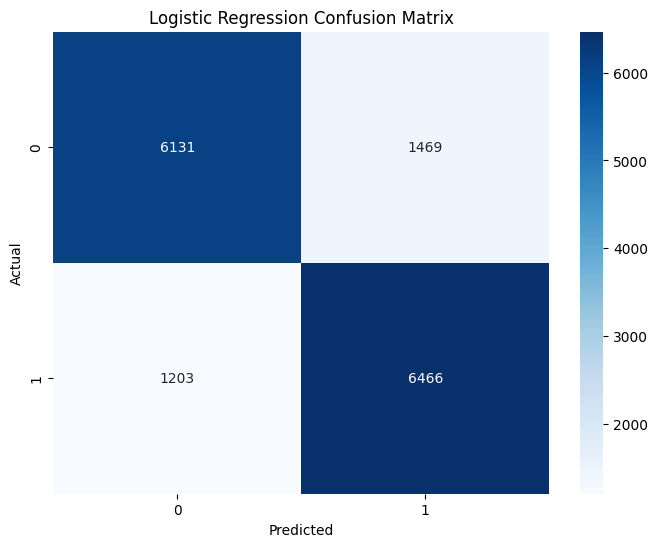

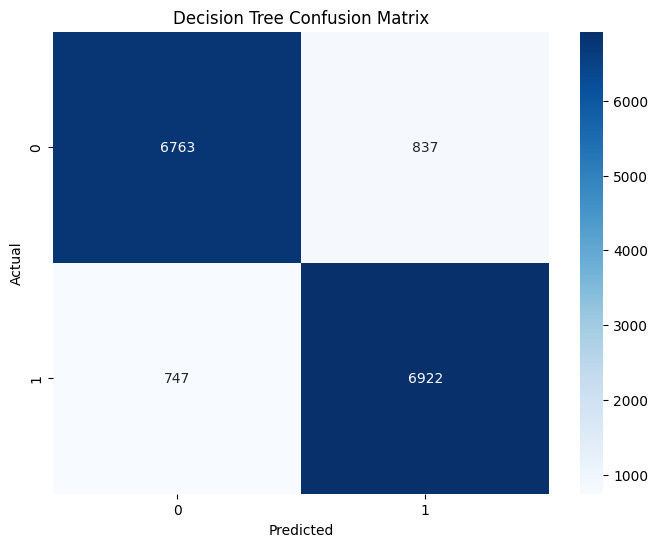

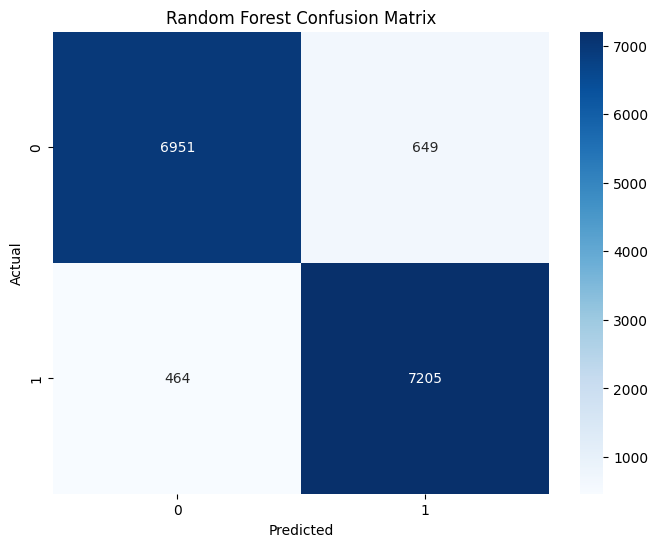

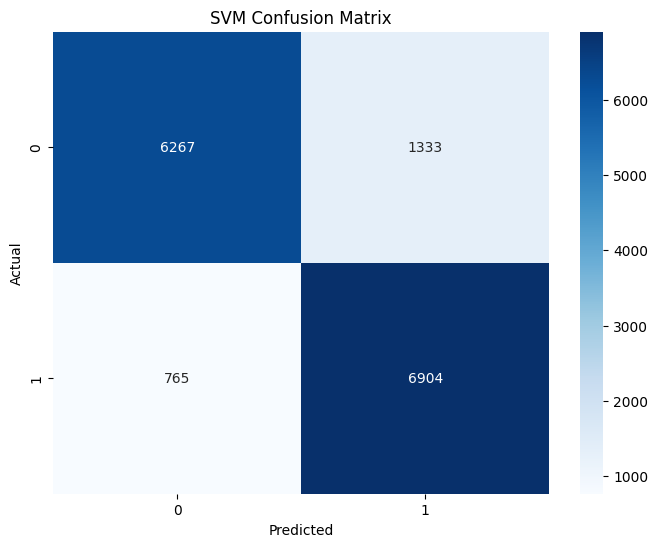

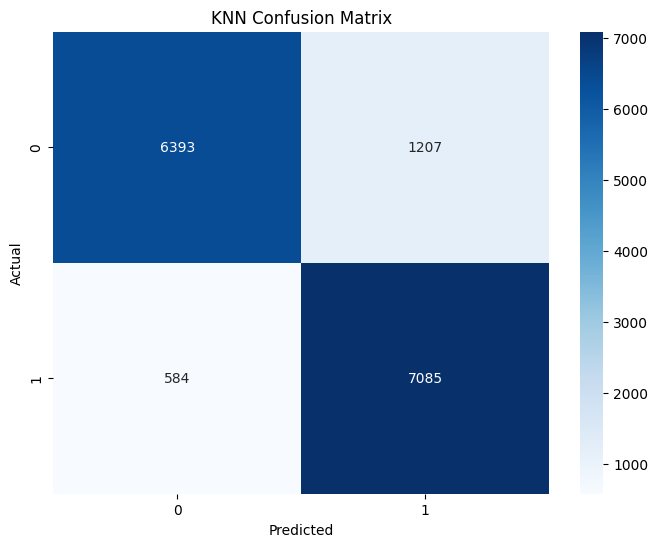

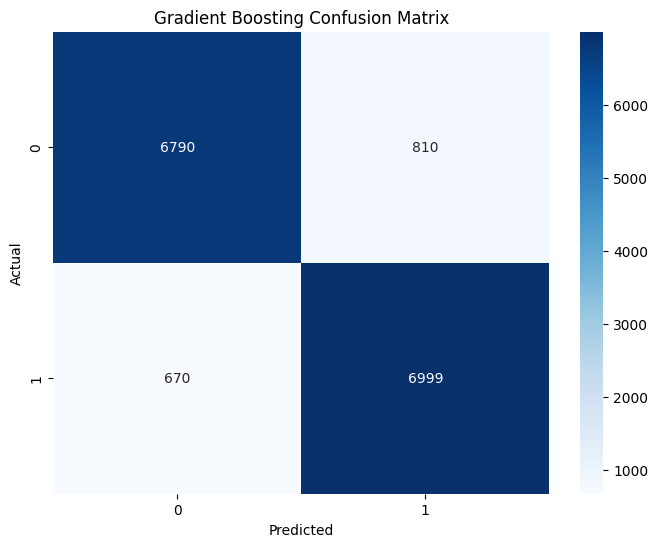

In [168]:
for model_name,y_pred in prediction.items():
  confusion=confusion_matrix(y_test,y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
  plt.title(f'{model_name} Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()


In [169]:
best_model=max(result,key=lambda k:result[k]['f1'])
print(f"Best Model: {best_model}")

Best Model: Random Forest


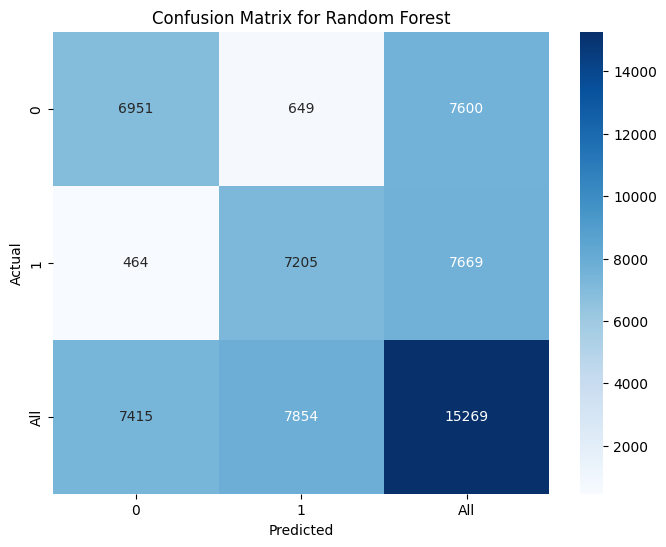

In [170]:
for model_name,y_pred in prediction.items():
  if model_name==best_model:
      confusion_matrix_df=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)
      plt.figure(figsize=(8, 6))
      sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues')
      plt.title(f'Confusion Matrix for {model_name}')
      plt.show()

In [171]:
for model_name,y_pred in prediction.items():
  print(f"Classification Report for {model_name}:")
  print(classification_report(y_test, y_pred))
  print()

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      7600
           1       0.81      0.84      0.83      7669

    accuracy                           0.83     15269
   macro avg       0.83      0.82      0.82     15269
weighted avg       0.83      0.83      0.82     15269


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7600
           1       0.89      0.90      0.90      7669

    accuracy                           0.90     15269
   macro avg       0.90      0.90      0.90     15269
weighted avg       0.90      0.90      0.90     15269


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7600
           1       0.92      0.94      0.93      7669

    accuracy                           0.93     152

In [172]:
for model_name,y_pred in prediction.items():
  if model_name==best_model:
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print()

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7600
           1       0.92      0.94      0.93      7669

    accuracy                           0.93     15269
   macro avg       0.93      0.93      0.93     15269
weighted avg       0.93      0.93      0.93     15269




In [173]:
best_model=max(result,key=lambda k:result[k]['f1'])
print(f"Best Model: {best_model}")

Best Model: Random Forest



**Hyperparameter Tuning**

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [175]:
model_RF=RandomForestClassifier()

In [176]:
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}


In [177]:
random_search=RandomizedSearchCV(estimator=model_RF,param_distributions=param_grid,n_iter=10,cv=5,scoring='accuracy',random_state=42)
random_search.fit(x_train,y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [178]:
best_params=random_search.best_params_
best_params

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 30}

**Save the Model:**

In [179]:
import joblib
joblib.dump(random_search, 'best_marketing_model.pkl')
print("Model saved successfully.")

Model saved successfully.


In [180]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
    ('scaler',Scaler),
    ('model',random_search)
])

In [181]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                                    param_distributions={'max_depth': [None, 10,
                                                                       20, 30],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                               5,
                                                                               10],
                                                         'n_estimators': [100,
                                                                          200,
                                                                          300]},
                                    random_state=42, scoring='accuracy'))])

In [182]:
pipeline_file='best_marketing_pipeline.pkl'
joblib.dump(pipeline,pipeline_file)
print(f"Pipeline saved successfully to {pipeline_file}")

Pipeline saved successfully to best_marketing_pipeline.pkl


**Testing The Model With Unseen Data**

In [183]:
pipeline=joblib.load('best_marketing_pipeline.pkl')

In [184]:
columns=['age', 'job', 'balance', 'housing', 'loan', 'day', 'month', 'duration',
       'campaign','y']

In [185]:
data =bank_data[columns]
data

,age,job,balance,housing,loan,day,month,duration,campaign,y
0,58,management,2143,yes,no,5,may,261,1,no
1,44,technician,29,yes,no,5,may,151,1,no
2,33,entrepreneur,2,yes,yes,5,may,76,1,no
3,47,blue-collar,1506,yes,no,5,may,92,1,no
4,33,unknown,1,no,no,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,825,no,no,17,nov,977,3,yes
45207,71,retired,1729,no,no,17,nov,456,2,yes
45208,72,retired,5715,no,no,17,nov,1127,5,yes
45209,57,blue-collar,668,no,no,17,nov,508,4,no


In [186]:
y_0 = data[data['y'] == 'no'].sample(n=5, random_state=42)
y_1 = data[data['y'] == 'yes'].sample(n=5, random_state=42)
unseen_datas = pd.concat([y_0, y_1])
unseen_datas = unseen_datas.sample(frac=1, random_state=42).reset_index(drop=True)
unseen_datas

,age,job,balance,housing,loan,day,month,duration,campaign,y
0,50,admin.,3608,yes,no,14,may,196,8,yes
1,36,blue-collar,520,yes,no,23,may,110,2,no
2,41,blue-collar,246,no,no,19,jun,683,3,yes
3,28,unemployed,1055,no,no,28,jan,196,1,no
4,42,management,1435,yes,no,7,may,1148,1,yes
5,38,technician,1314,yes,yes,16,jul,378,2,no
6,34,admin.,247,no,no,8,oct,401,2,yes
7,27,technician,290,no,no,10,aug,88,1,no
8,41,unemployed,28,yes,no,4,feb,358,2,no
9,35,management,859,yes,yes,19,nov,1554,1,yes


saved to csv

In [192]:
unseen_datas.to_csv('unseen_datas.csv',index=False)

In [193]:
categorical_columns = unseen_datas.select_dtypes(include=['object']).columns

In [194]:
for col in categorical_columns:
    le = LabelEncoder()
    unseen_datas[col] = le.fit_transform(unseen_datas[col])

In [195]:
unknown_data=unseen_datas.drop('y',axis=1)
unseen_labels=unseen_datas['y']

In [196]:
predictions=pipeline.predict(unknown_data)
accuracy=accuracy_score(unseen_labels,predictions)
print(f"Accuracy on unseen data: {accuracy}")
print(f"Predictions on unseen data: {predictions}")


Accuracy on unseen data: 0.4
Predictions on unseen data: [0 1 1 1 0 0 1 1 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [197]:
print(f"Classification Report:\n {classification_report(unseen_labels,predictions)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.40      0.40      0.40         5

    accuracy                           0.40        10
   macro avg       0.40      0.40      0.40        10
weighted avg       0.40      0.40      0.40        10



#**Conclusions**

Through extensive experimentations, it was found out that the best algorithm for the problem was actually Gradient Boosting, which gives an accuracy of 93%. Key steps followed are:

Optimization of Hyperparameters to yield better performance.
Addressing Class Imbalance Appropriately with Correct Resampling Techniques.
Handling missing and "unknown" values to maintain data integrity.


## **Future Work**

The model has great potential to:

1. Identify high-probability clients and enhance targeted marketing efforts.
2. Reduce campaign costs by targeting the appropriate prospects.
3. Offer insights into influential factors, enabling tailored communication strategies.
4. Continuously improve with more data to be collected for adaptability with changing client behavior.